**<div style="text-align: center;">
    <h1> A replication study of "Discover-then-Name: Task-Agnostic Concept Bottlenecks via Automated Concept Discovery": interactive notebook** </h1>
</div>




This interactive notebook walks you through the process to create local explanation plots with the DN-CBM model. The included model is a model finetuned with 30 epochs, with a cosine coefficient of 1e-4. If you would like to train a model from scratch, you can follow the instructions from the Github repository. This code will yield the same local explanations as we used in our paper.

We recommend running this notebook in Google Colab.







### **Import neccesary packages and files**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/FACT-AI')

In [7]:
import torch
!pip install ftfy
import ftfy
import torchvision
import os
import clip
import dncbm
!pip install jaxtyping
!pip install transformer_lens
!pip install -e sparse_autoencoder/

from dncbm.visualization.drawing_functions import to_numpy_img, to_numpy
from dncbm.utils import get_printable_class_name, common_init, get_probe_dataset
from dncbm.visualization.canvas import Canvas
from dncbm.visualization.vis_utils import latex_bf

!sudo apt-get update
!sudo apt-get install texlive-latex-extra dvipng cm-super


ValueError: module functions cannot set METH_CLASS or METH_STATIC

### **Generate local explanations of CIFAR10 with our most explainable finetuned model**

This code will generate the local explanation plots and place them in the 'analysis' folder.

NOTE: this process may take a while.


In [37]:
!PYTHONPATH=. python scripts/visualization/vis_local_explanations_dump.py --sae_dataset cc3m --img_enc_name clip_RN50 --method_name ours  --probe_split val --probe_dataset cifar10 --which_ckpt final --lr 0.0005 --l1_coeff 3e-5 --expansion_factor 8 --resample_freq 10  --num_epochs 30 --cosine_coefficient 1e-4 --probe_lr 1e-3  --probe_sparsity_loss_lambda 1.0 --probe_classification_loss 'CE' --probe_epochs 200 --probe_sparsity_loss L1 --probe_eval_coverage_freq 50

2025-01-31 09:53:24.896764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738317204.917554    9555 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738317204.924313    9555 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 09:53:24.945883: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Files already downloaded and verified
SAE config_used: lr0.0005_l1coeff3e-05_ef8_rf10_hookout_bs4096_epo30_cc0.0001
/content/

This code will plot the local explanations. They will end up in the ./analysis folder. You can interrupt this process earlier if you are satisfied with the results. If you don't interrupt this, it will generate 1000 local explanation plots.

In [41]:
!PYTHONPATH=. python scripts/visualization/vis_local_explanations_plot.py --sae_dataset cc3m --img_enc_name clip_RN50 --method_name ours  --probe_split val --probe_dataset cifar10 --which_ckpt final --lr 0.0005 --l1_coeff 3e-5 --expansion_factor 8 --resample_freq 10  --num_epochs 30 --cosine_coefficient 1e-4 --probe_lr 1e-3  --probe_sparsity_loss_lambda 1.0 --probe_classification_loss 'CE' --probe_epochs 200 --probe_sparsity_loss L1 --probe_eval_coverage_freq 50

2025-01-31 10:08:49.661988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738318129.685387   15827 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738318129.691705   15827 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 10:08:49.713991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Files already downloaded and verified
SAE config_used: lr0.0005_l1coeff3e-05_ef8_rf10_hookout_bs4096_epo30_cc0.0001
/content/

### **Load the generated plots**

In [4]:
import os
!pip install fitz
!pip install frontend
!pip install pymupdf
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.4 MB/s eta 0:00:00


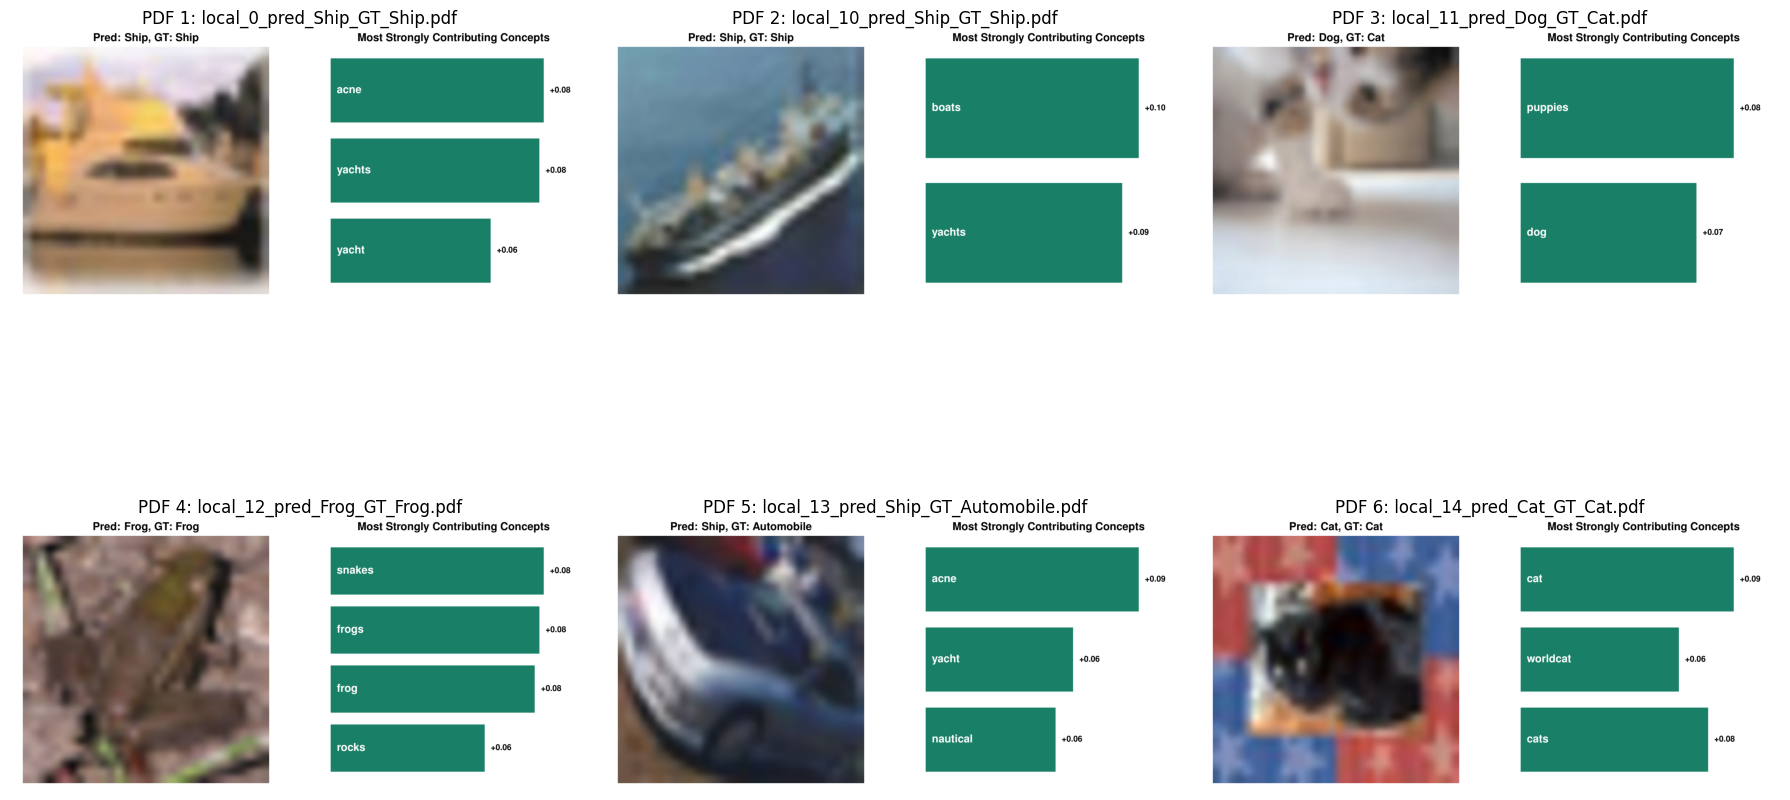

In [5]:
vis_folder = "./analysis/local_explanations/clip_RN50/cifar10/vis"

# Get the list of PDF files in the folder
pdf_files = sorted([f for f in os.listdir(vis_folder) if f.endswith(".pdf")])

# Create a figure with subplots for displaying the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Display the first page of the first 6 PDFs
for i, pdf_name in enumerate(pdf_files[:6]):
    pdf_path = os.path.join(vis_folder, pdf_name)

    # Open the PDF
    doc = fitz.open(pdf_path)
    page = doc[0]  # First page

    # Convert to an image
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # Calculate row and column index for the subplot
    row, col = divmod(i, 3)

    # Display the image in the corresponding subplot
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"PDF {i+1}: {pdf_name}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

### **These plots perfectly match our plots we generated during our research:**
(more plots can be found in the Appendix of our paper)


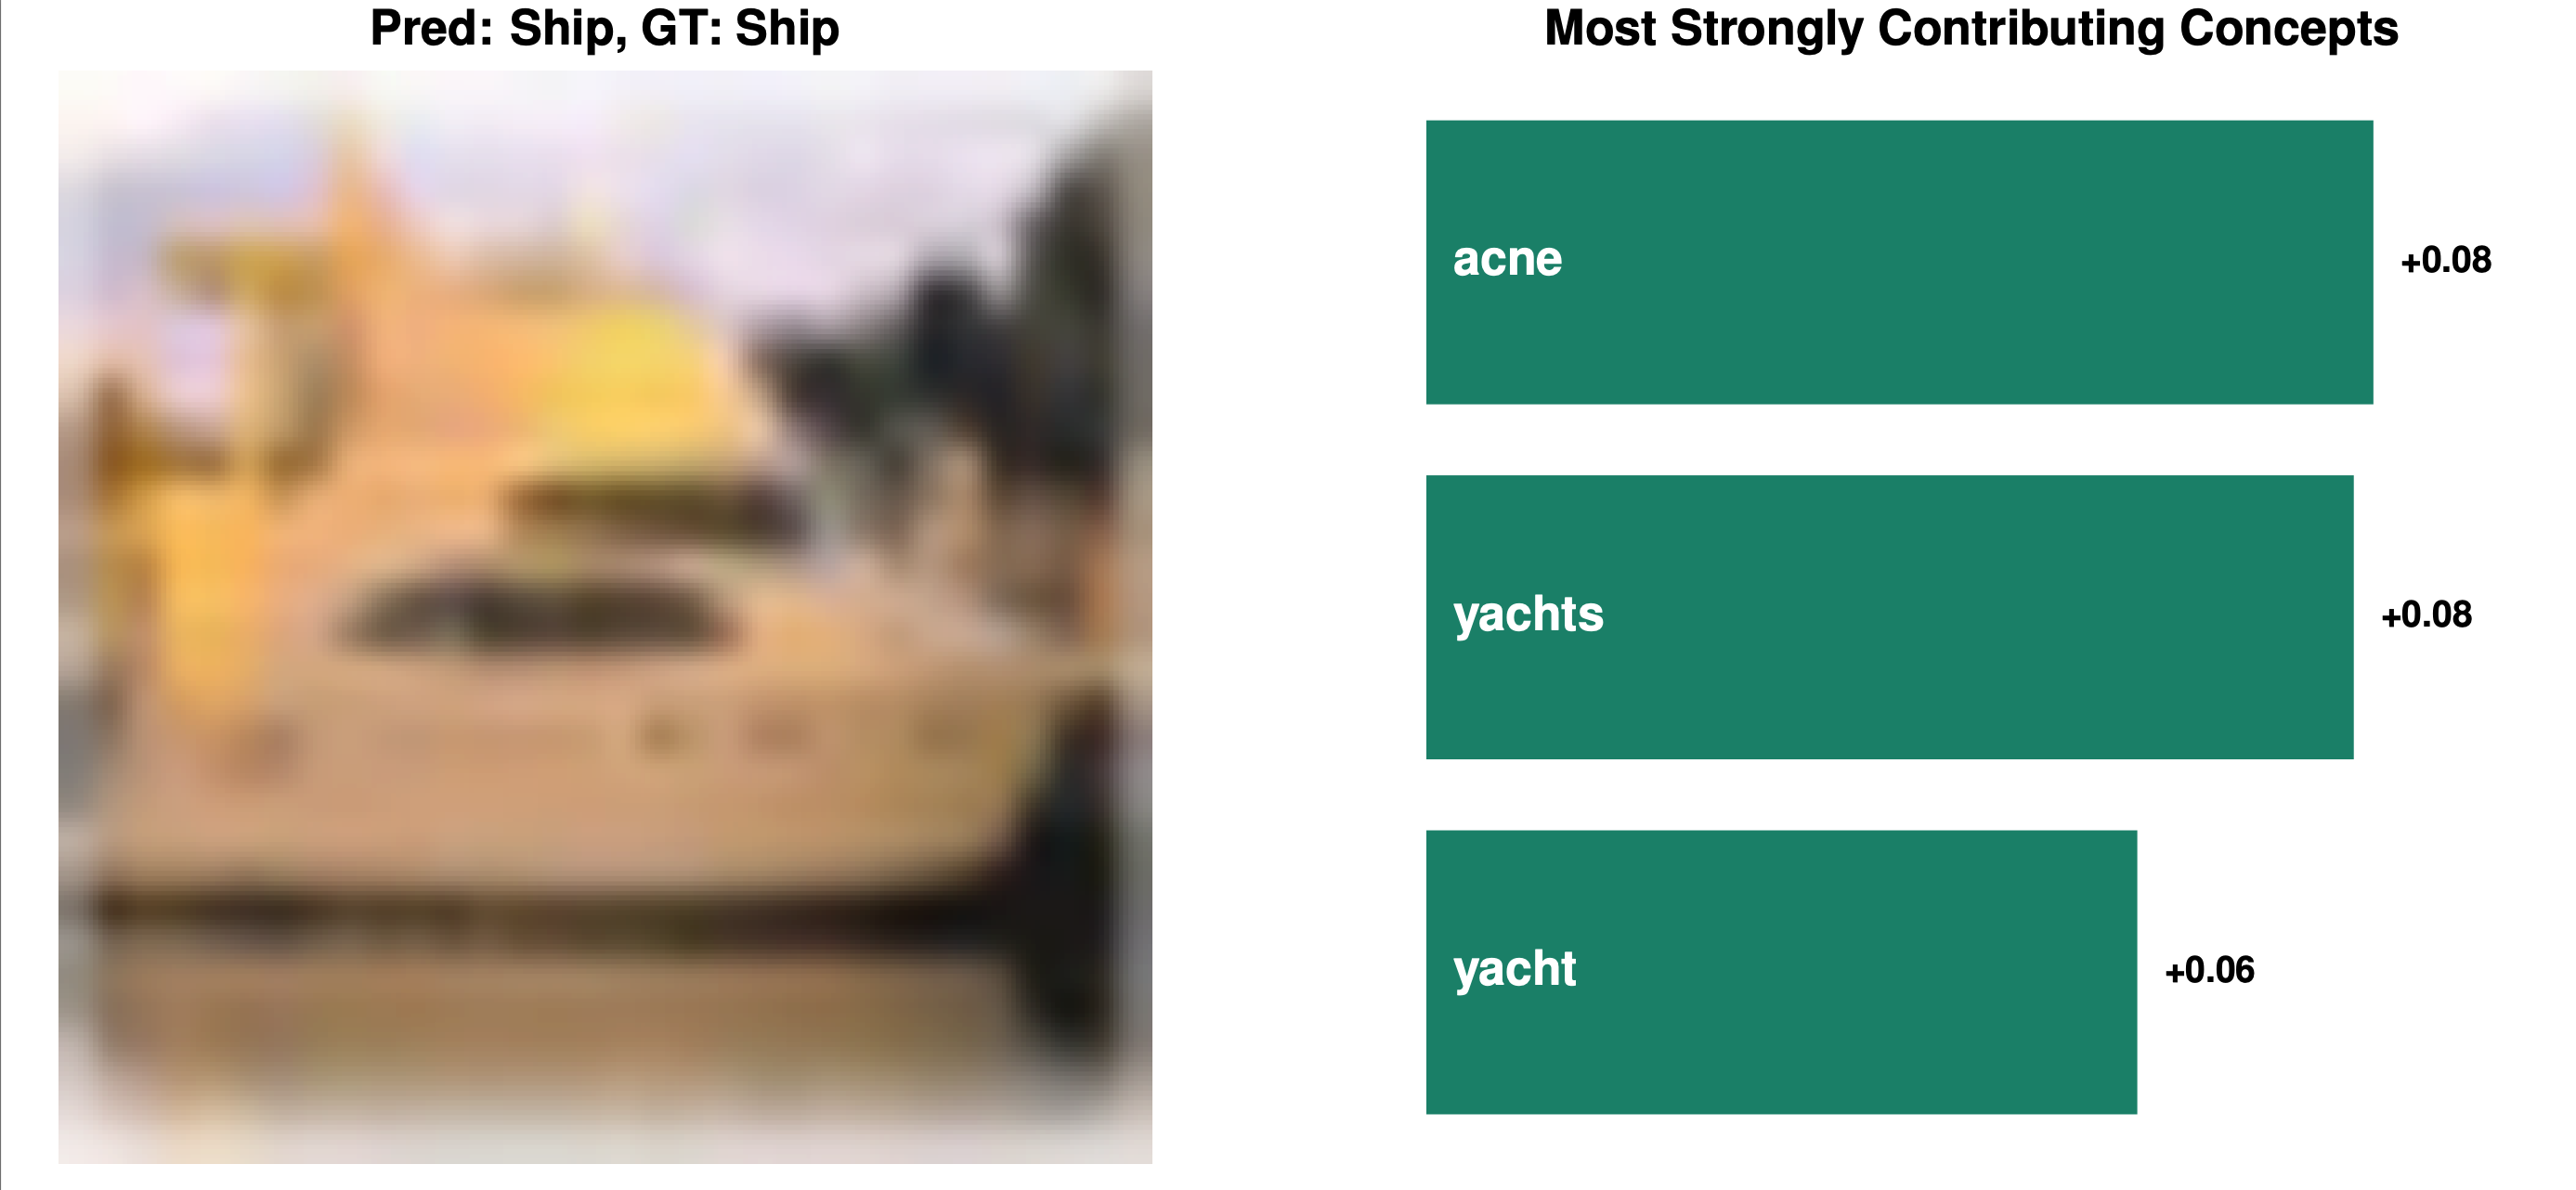

In [15]:
from IPython.display import Image
img_path = '/content/drive/My Drive/FACT-AI/figures/examplelocal.png'
Image(img_path, width=800)

# **Main results**

This section will contain some of our main results, which we reported in our paper.



### **Model performance**
The first table is a comparison of performance of the original and reproduced results. We report the
classification accuracy (%) of the original paper and our reproduction using CLIP ResNet-50 on ImageNet, Places365, CIFAR10 and CIFAR100. "Ours" is our model suggestion, which incorporates a cosine loss
function with C = 1e−4 leading to improved explainability.

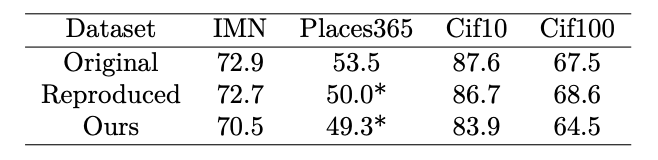

In [16]:
img_path = '/content/drive/My Drive/FACT-AI/figures/tableresults.png'
Image(img_path, width=800)

### **Task agnosticity plots**
We present the concepts with the highest cosine
similarity score, alongside their top-activating images from four datasets.

We did this to validate the task-agnosticity claim that the proposed method has discovered dictionary vectors that align well with text embeddings of the concepts they represent in CLIP space, and that the approach supports task-agnostic explanations of the model’s decision proces. To visualize this we extracted the top-activating images with the highest cosine similarity score, across the four datasets. Notably, the top-activating images strongly correspond to their respective concepts, indicating a high degree of semantic consistency. This validates the claim the original authors made.

----

This first image below presents the top 4 aligning concepts

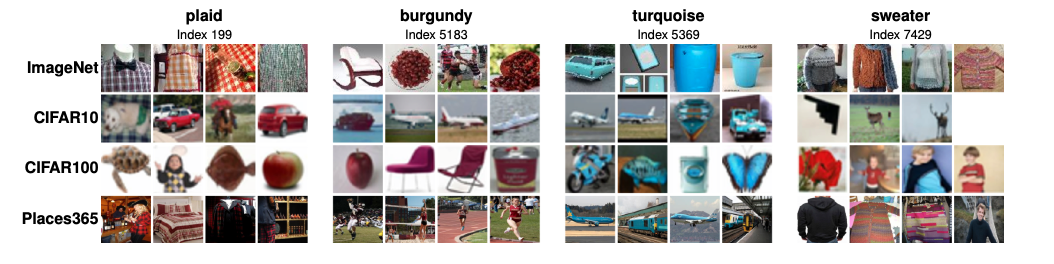

In [22]:
img_path = '/content/drive/My Drive/FACT-AI/figures/fig0000_node_ids[199, 5183, 5369, 7429].png'
Image(img_path, width=1000)


The image below presents 4 low aligning concepts.

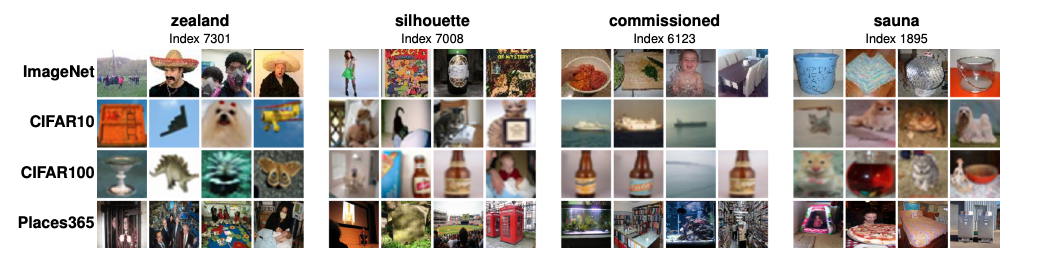

In [23]:
img_path = '/content/drive/My Drive/FACT-AI/figures/fig0004.png'
Image(img_path, width=1000)

### **Survey results**
Below are the results from our user study, in which we showed participants 5 images belonging to an assigned concept, and asked them in how many pictures they recognised this concept. We show with statistical significance that our concepts are more explainable.

Below is an example of a row of 5 images, generated for the concept 'Tomb'.

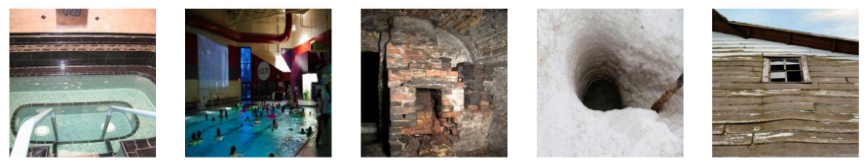

In [16]:
img_path = '/content/drive/My Drive/FACT-AI/figures/surveyex.png'
Image(img_path, width=1000)

These are the results of our survey:

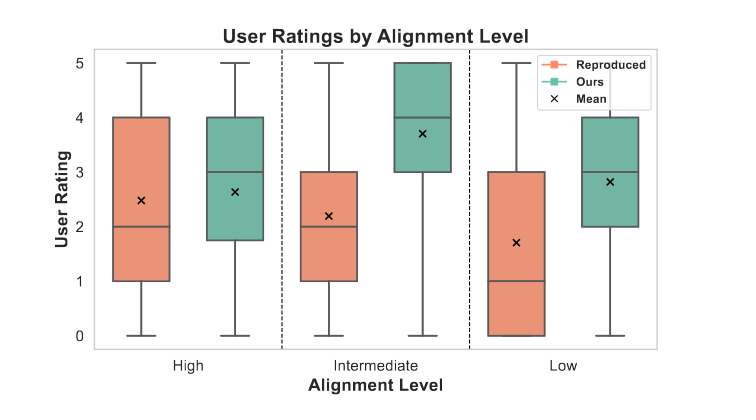

In [17]:
img_path = '/content/drive/My Drive/FACT-AI/figures/surveyresults.png'
Image(img_path, width=1000)


# **Plotting the average cosine similarities of all concepts after finetuning**
In this section we will plot the cosine similarity of each assigned concept to its CLIP embedding.

In [17]:
import torch
import torch.nn.functional as F
import os
import matplotlib
import re
import matplotlib.pyplot as plt
import numpy as np

def load_vocabulary(vocabulary_path):
    """
    Loads vocabulary from a text file.
    Args:
        vocabulary_path (str): Path to the vocabulary file.
    Returns:
        list: A list of vocabulary words.
    """
    with open(vocabulary_path, 'r') as file:
        words = [line.strip() for line in file if line.strip()]
    return words

def name_concepts(decoder_weights, clip_embeddings):
    """
    Matches decoder weights to the closest clip embeddings using cosine similarity.
    Args:
        decoder_weights (Tensor): Decoder weights tensor.
        clip_embeddings (Tensor): CLIP embeddings tensor.
    Returns:
        tuple: Best cosine similarities and corresponding indices.
    """
    decoder_weights_norm = F.normalize(decoder_weights, p=2, dim=1)
    clip_embeddings_norm = F.normalize(clip_embeddings, p=2, dim=1)
    cosine_similarities = torch.matmul(clip_embeddings_norm, decoder_weights_norm.T)
    best_similarities, best_indices = cosine_similarities.max(dim=0)
    return best_similarities, best_indices

def load_tensors(clip_path, SAE_path):
    """
    Loads the clip embeddings and sparse autoencoder tensors.
    Args:
        clip_path (str): Path to the clip embeddings file.
        sae_path (str): Path to the sparse autoencoder file.
    Returns:
        tuple: clip_embeddings (Tensor), decoder_weights (Tensor)
    """
    clip_embeddings = torch.load(clip_path, map_location=torch.device('cpu')).float()
    sae = torch.load(SAE_path, map_location=torch.device('cpu'))
    decoder_weights = sae["decoder._weight"].squeeze(0).float().T
    return clip_embeddings, decoder_weights

def calculate_similarity_distribution(embeddings):
    """
    Calculates the pairwise cosine similarity distribution for a set of embeddings.

    Args:
        embeddings (Tensor): Tensor of shape (n, d) where n is the number of embeddings
                              and d is the dimensionality of each embedding.
        batch_size (int): The size of each batch for computing pairwise similarities.

    Returns:
        Tensor: A flattened tensor containing pairwise cosine similarities.
    """
    embeddings_norm = F.normalize(embeddings, p=2, dim=1)
    similarities = torch.matmul(embeddings_norm, embeddings_norm.T)
    return similarities.flatten()

def calculate_feature_distribution(embeddings):
    """
    Calculates the mean of each feature across all embeddings.

    Args:
        embeddings (Tensor): Tensor of shape (n, d), where n is the number of embeddings
                              and d is the dimensionality of each embedding.

    Returns:
        Tensor: The mean values of each feature across all embeddings.
    """
    mean_embeddings = embeddings.mean(dim=0)
    return mean_embeddings

def plot_feature_distribution(mean_embeddings):
    """
    Plots the distribution of the mean values of each feature.

    Args:
        mean_embeddings (Tensor): The mean values of each feature (tensor of shape (d,)).
    """
    plt.figure(figsize=(12, 4))
    plt.plot(mean_embeddings.cpu().numpy(), color='blue', linestyle='-', alpha=0.5)
    plt.title("Mean of Each Feature Across All Embeddings")
    plt.xlabel("Feature Index")
    plt.ylabel("Mean Value")
    plt.grid(True)
    plt.show()

def plot_normalized_histogram(data, bins=500, title="Normalized Histogram", xlabel="Cosine Similarity", ylabel="Density (Normalized Frequency)"):
    """
    Plots a normalized histogram of the provided data.

    Args:
        data (Tensor or array-like): Data to plot the histogram for.
        bins (int): Number of bins in the histogram. Default is 500.
        title (str): Title of the plot. Default is "Normalized Histogram".
        xlabel (str): Label for the x-axis. Default is "Cosine Similarity".
        ylabel (str): Label for the y-axis. Default is "Density (Normalized Frequency)".
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data.cpu().numpy(), bins=bins, color='blue', alpha=0.7, density=True)  # Normalize the histogram
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()



def plot_ordered_tensor(tensor, filename, save_pdf=False, title=None):
    """
    Plots an ordered tensor and saves the plot as a PDF.

    Parameters:
    - tensor (torch.Tensor): The tensor to be sorted and plotted.
    - filename (str): The name of the PDF file to save the plot.
    """
    ordered_tensor, _ = torch.sort(tensor, descending=True)

    plt.figure(figsize=(10, 6))
    plt.plot(ordered_tensor.numpy(), color='b')
    plt.xlabel("Nodes ranked in similarities with assigned concepts")
    plt.ylabel(r"$v_c$")
    plt.tick_params(axis='both', labelsize=16)
    plt.grid(True)

    if title is not None:
        plt.title(title)

    # Save the figure as a PDF
    if save_pdf:
        plt.savefig(f"{filename}.pdf", format="pdf", bbox_inches="tight")


### **Load the autoencoder and the clip embeddings**
We load the embeddings of the vocabulary we used for training the sparse autoencoder. Note that these embeddings are specific for our dataset used. (Google 20k)

In [9]:
sae_cc1e4_path = "./SAE/SAEImg/cc3m/clip_RN50/out/lr0.0005_l1coeff3e-05_ef8_rf10_hookout_bs4096_epo30_cc0.0001/sae_checkpoints/sparse_autoencoder_final.pt"
clip_path = "embeddings_clip_RN50_clipdissect_20k.pth"

### **Plot the distribution of cosine similarity scores**

<ipython-input-17-02d8b6a14b11>:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  clip_embeddings = torch.load(clip_path, map_location=torch.device('cpu')).float()
<ipython-

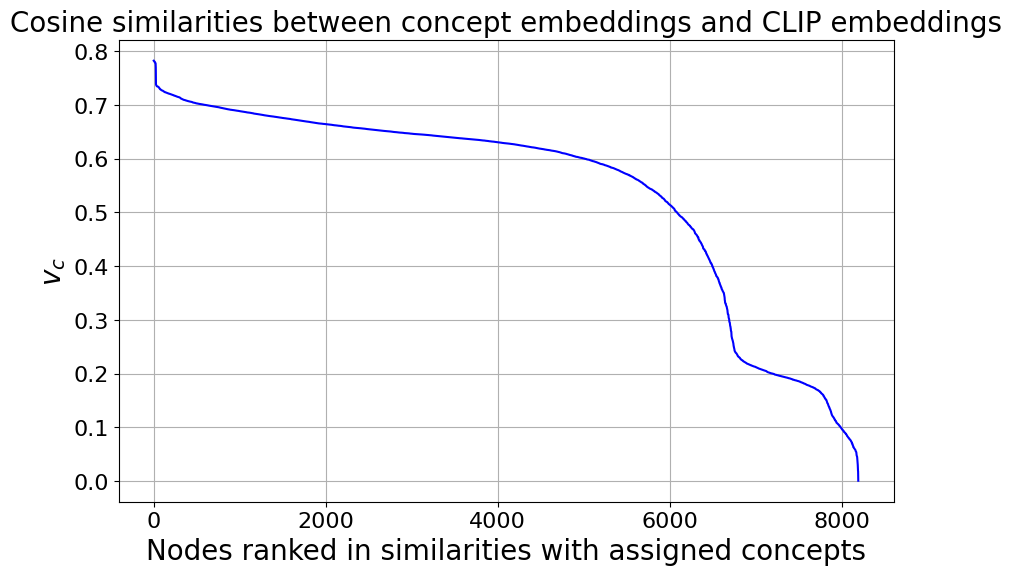

In [18]:
clip_embeddings, decoder_weights = load_tensors(clip_path, sae_cc1e4_path)
best_similarities_clip, best_indices_clip = name_concepts(decoder_weights, clip_embeddings)
plot_ordered_tensor(best_similarities_clip, save_pdf=True, title="Cosine similarities between concept embeddings and CLIP embeddings", filename='orderedweights')

We clearly see this is an improvement compared to the original cosine similarity distibution below.

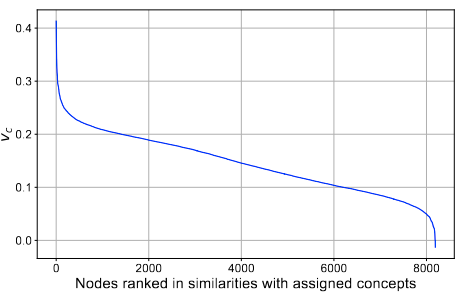

In [19]:
img_path = '/content/drive/My Drive/FACT-AI/figures/cosinesim.png'
Image(img_path, width=1000)

### For the entire project codebase, we refer to the Github repository, in which a step by step guide is included to train the autoencoders, probes and to create several visualizations. Thank you!